<a href="https://colab.research.google.com/github/Haabibi/Stroke-Rehab-Task-Estimation/blob/master/retrainingYOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.4.0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


In [1]:
!git clone https://github.com/ultralytics/yolov3  # clone

Cloning into 'yolov3'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 8590 (delta 26), reused 34 (delta 14), pack-reused 8540
Receiving objects: 100% (8590/8590), 6.91 MiB | 21.19 MiB/s, done.
Resolving deltas: 100% (5919/5919), done.


In [2]:
%cd /content/yolov3
!pwd

/content/yolov3
/content/yolov3


In [3]:
!pip install -U -r requirements.txt

Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 2)) (1.18.2)
Requirement already up-to-date: opencv-python>=4.1 in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 3)) (4.2.0.34)
Requirement already up-to-date: torch>=1.4 in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 4)) (1.4.0)
Requirement already up-to-date: matplotlib in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 5)) (3.2.1)
Requirement already up-to-date: pycocotools in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 6)) (2.0.0)
Requirement already up-to-date: tqdm in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 7)) (4.45.0)
Requirement already up-to-date: pillow in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 8)) (7.1.1)


In [4]:
!bash weights/download_yolov3_weights.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   2103      0 --:--:-- --:--:-- --:--:--  2103
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  236M    0  236M    0     0   100M      0 --:--:--  0:00:02 --:--:--  159M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   1665      0 --:--:-- --:--:-- --:--:--  1665
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  240M    0  240M    0     0  66.0M      0 --:--:--  0:00:03 --:--:-- 89.3M


In [5]:
!python3 train.py --data /content/drive/My\ Drive/cfg/rehab20.data --cfg /content/drive/My\ Drive/cfg/custom.cfg --weights 'yolov3.pt' --nosave --cache-images
%cp weights/last.pt /content/drive/My\ Drive/backup

Namespace(accumulate=4, adam=False, batch_size=16, bucket='', cache_images=True, cfg='/content/drive/My Drive/cfg/custom.cfg', data='/content/drive/My Drive/cfg/rehab20.data', device='', epochs=300, evolve=False, img_size=[416], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='yolov3.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2020-04-04 21:42:40.824771: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Model Summary: 222 layers, 6.1626e+07 parameters, 6.1626e+07 gradients
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   1516      0 --:--:-- --:--:-- --:--:--  1516
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0

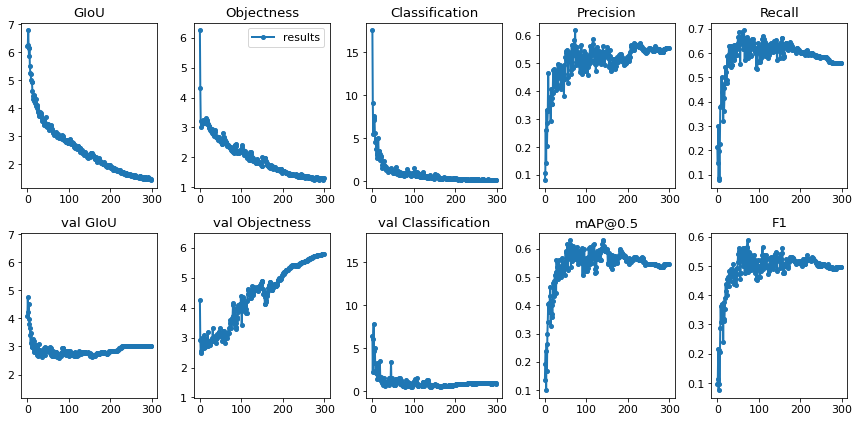

In [6]:
from utils import utils
utils.plot_results()

In [8]:
!python3 detect.py --cfg /content/drive/My\ Drive/cfg/custom.cfg --weights /content/yolov3/weights/last.pt 

Namespace(agnostic_nms=False, cfg='/content/drive/My Drive/cfg/custom.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/coco.names', output='output', save_txt=False, source='data/samples', view_img=False, weights='/content/yolov3/weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 222 layers, 6.1626e+07 parameters, 6.1626e+07 gradients
image 1/2 data/samples/bus.jpg: 512x384 Done. (0.033s)
image 2/2 data/samples/zidane.jpg: 288x512 Done. (0.018s)
Results saved to /content/yolov3/output
Done. (0.136s)


In [9]:
!python3 detect.py --cfg /content/drive/My\ Drive/cfg/custom.cfg --weights /content/yolov3/weights/last.pt  --source /content/drive/My\ Drive/survey\ images/

Namespace(agnostic_nms=False, cfg='/content/drive/My Drive/cfg/custom.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/coco.names', output='output', save_txt=False, source='/content/drive/My Drive/survey images/', view_img=False, weights='/content/yolov3/weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 222 layers, 6.1626e+07 parameters, 6.1626e+07 gradients
image 1/53 /content/drive/My Drive/survey images/ic_1.jpg: 384x512 1 airplanes, Done. (0.027s)
image 2/53 /content/drive/My Drive/survey images/ic_10.jpg: 384x512 1 airplanes, Done. (0.017s)
image 3/53 /content/drive/My Drive/survey images/ic_11.jpg: 384x512 1 airplanes, Done. (0.019s)
image 4/53 /content/drive/My Drive/survey images/ic_12.jpg: 384x512 1 airplanes, Done. (0.017s)
image 5/53 /content/drive/My Drive/survey images/ic_13.jpg: 384x512 1 airplanes, Done. (0.017s)
image 6/53 /conten

In [0]:
!python detect.py --source /content/drive/My\ Drive/survey\ images/

Namespace(agnostic_nms=False, cfg='cfg/yolov3-spp.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/coco.names', output='output', save_txt=False, source='/content/drive/My Drive/survey images/', view_img=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
image 1/53 /content/drive/My Drive/survey images/ic_1.jpg: 384x512 1 chairs, Done. (0.023s)
image 2/53 /content/drive/My Drive/survey images/ic_10.jpg: 384x512 1 cups, 1 spoons, 1 potted plants, Done. (0.017s)
image 3/53 /content/drive/My Drive/survey images/ic_11.jpg: 384x512 1 potted plants, Done. (0.017s)
image 4/53 /content/drive/My Drive/survey images/ic_12.jpg: 384x512 1 bottles, 1 potted plants, Done. (0.017s)
image 5/53 /content/drive/My Drive/survey images/ic_13.jpg: 384x512 1 bottles, 1 cups, 1 pot

In [0]:
from PIL import Image

for img in os.listdir('/content/drive/My Drive/survey images'):
  print(img)
  if img[0] == '.':
    continue
  im = Image.open( os.path.join('/content/drive/My Drive/survey images', img) )

  width, height = im.size

  left = width / 6.4
  top = height / 8 
  right = 5.4 * width / 6.4
  bottom = 5 * height / 8
  im1= im.crop((left, top, right, bottom))
  im1 = im1.save( os.path.join('/content/drive/My Drive/cropped_survey', img) )

In [0]:
!python detect.py --source /content/drive/My\ Drive/survey\ images

Namespace(agnostic_nms=False, cfg='cfg/yolov3-spp.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/coco.names', output='output', save_txt=False, source='/content/drive/My Drive/survey images', view_img=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
image 1/53 /content/drive/My Drive/survey images/ic_1.jpg: 384x512 1 chairs, Done. (0.023s)
image 2/53 /content/drive/My Drive/survey images/ic_10.jpg: 384x512 1 cups, 1 spoons, 1 potted plants, Done. (0.017s)
image 3/53 /content/drive/My Drive/survey images/ic_11.jpg: 384x512 1 potted plants, Done. (0.017s)
image 4/53 /content/drive/My Drive/survey images/ic_12.jpg: 384x512 1 bottles, 1 potted plants, Done. (0.017s)
image 5/53 /content/drive/My Drive/survey images/ic_13.jpg: 384x512 1 bottles, 1 cups, 1 pott

In [0]:
!mkdir output/output_yolov3
!mv output/*.jpg output/output_yolov3
!cp -r output/output_yolov3 /content/drive/My\ Drive/

In [12]:
!python3 detect.py --cfg /content/drive/My\ Drive/cfg/custom.cfg --weights /content/drive/My\ Drive/second_exp_weights/last.pt  --source /content/drive/My\ Drive/cropped_survey/ --names /content/drive/My\ Drive/rehab/rehab.names

Namespace(agnostic_nms=False, cfg='/content/drive/My Drive/cfg/custom.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='/content/drive/My Drive/rehab/rehab.names', output='output', save_txt=False, source='/content/drive/My Drive/cropped_survey/', view_img=False, weights='/content/drive/My Drive/second_exp_weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 222 layers, 6.1626e+07 parameters, 6.1626e+07 gradients
image 1/53 /content/drive/My Drive/cropped_survey/ic_1.jpg: 288x512 Done. (0.027s)
image 2/53 /content/drive/My Drive/cropped_survey/ic_10.jpg: 288x512 Done. (0.017s)
image 3/53 /content/drive/My Drive/cropped_survey/ic_11.jpg: 288x512 Done. (0.017s)
image 4/53 /content/drive/My Drive/cropped_survey/ic_12.jpg: 288x512 Done. (0.017s)
image 5/53 /content/drive/My Drive/cropped_survey/ic_13.jpg: 288x512 Done. (0.017s)
image 6/53 /content/drive/My Dri